# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,StratifiedKFold
!pip install scikit-plot
!pip install mlrose
import scikitplot as skplt
import sys
import six
sys.modules['sklearn.externals.six']=six
import mlrose
from yellowbrick.classifier.rocauc import roc_auc

In [4]:
!pip install chart_studio
!pip install pyfiglet
from kmeans_smote import KMeansSMOTE
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pyfiglet

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
data=pd.read_csv('customer churn.csv')
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values

In [8]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

From describe i can see the distribution of continous features

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have only three colums that are numerical rest of the columns are object

In [10]:
data.drop(['customerID'],axis=1,inplace=True)

Droping this column it is not important for eda as well as model building because it is just having unique id values

In [11]:
data1=data.select_dtypes(include='object')

Selection all the object columns so i can perform eda on that

In [12]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce',downcast='float')

Now this totalcharges was having the str values of there was the some emply space so i am converting all these str value and empty space values with nan

# Univariate Analysis

In [13]:
col=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

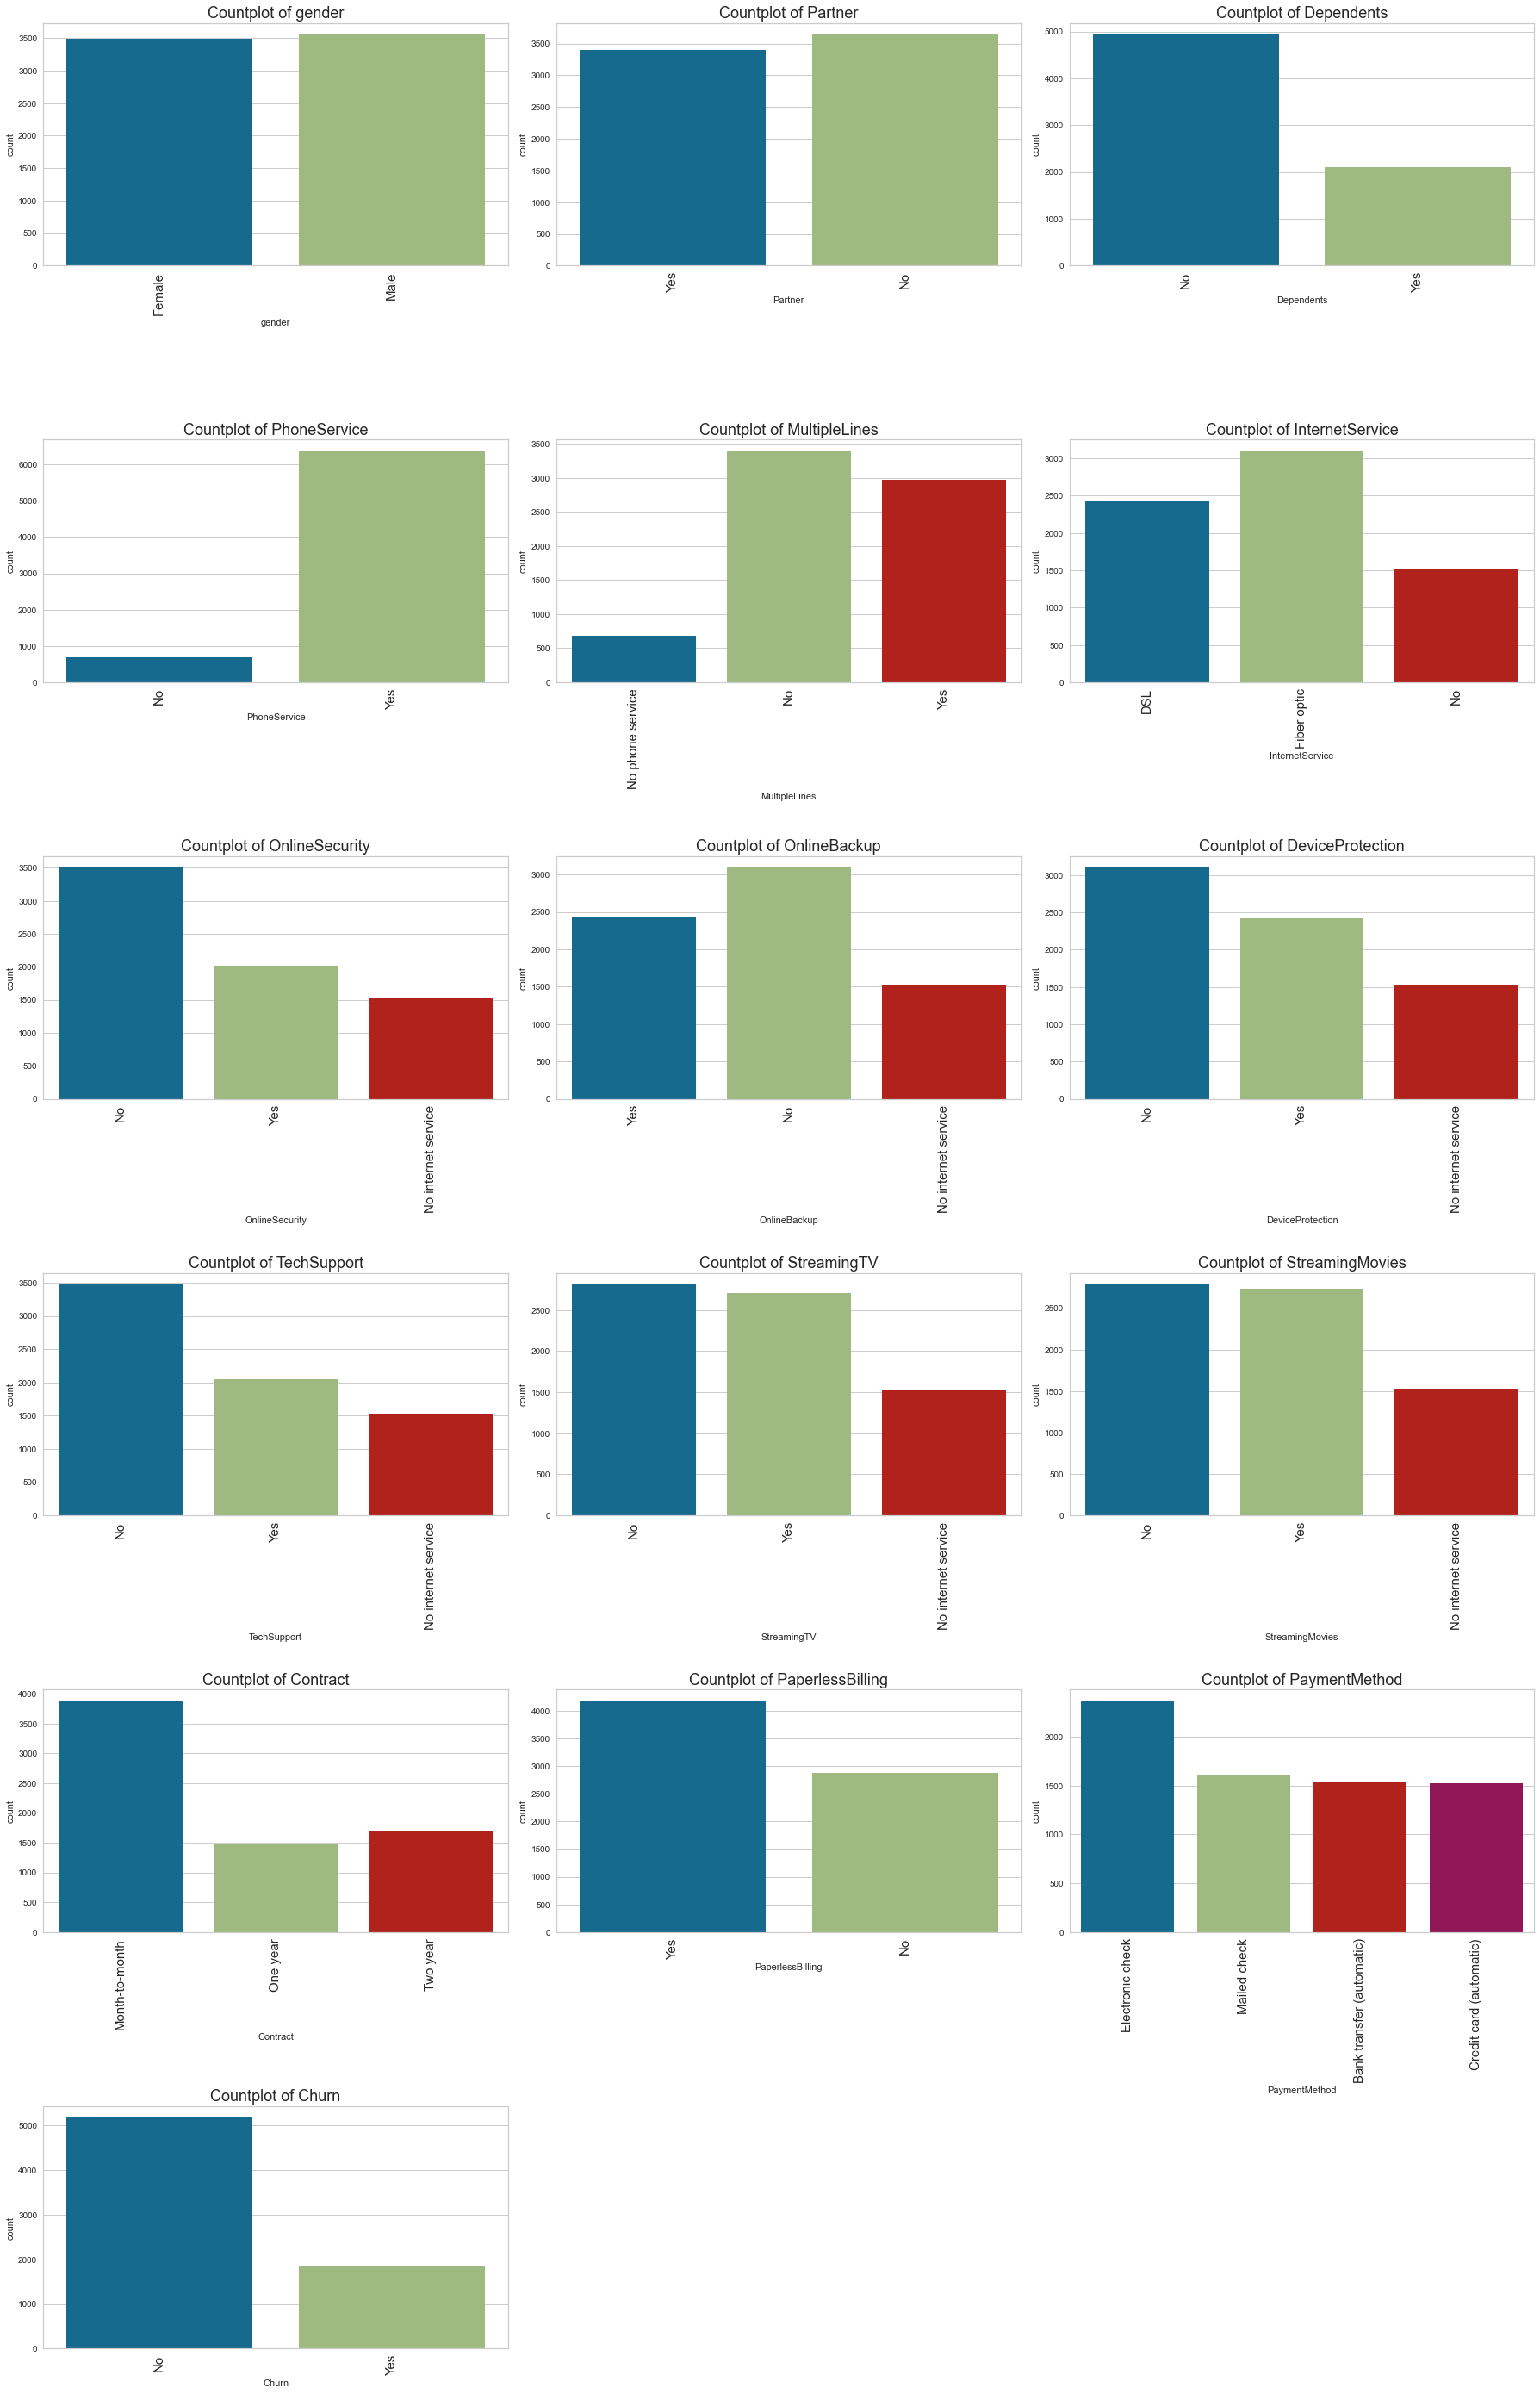

In [14]:
plt.figure(figsize=(25,65))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.countplot(data[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=15)
    plt.tight_layout()

# Observation

1-From gender the male has more count as compare to female

2-From Partner yes has less count no has least count

3-Dependence has high no count and yes has less count

4-From phoneservice i can say no has less count and yes has high count

5-From multipleline i can say no phone service has least count after that yes has second least count and no has the high count

6-From internet service no has least count after that DLS has least count and fiber optics has the high count

7-From onlinesecurity no has high count and no internet service has the least count

8-From onlinebackup No has high count No internet service has least count and Yes has second least count

9-From device protection i can say no has high count No. internet service has least count

10-From techsupport i can say No has high count and no internet service has very least count and yes has second least count

11-From streamingtv and streaming movies i can say no has high count and no internet service has very least count

12-From contract i can say month to month has high count means month to month contract is more popular and one year has least count and second least count has two year

13-From PaperlessBilling i can say Yes has more count means people use to take paperless billing and no has least count

14-From paymentmethod i can say Electronic check has high count means people use electriccheck method more as compare to to others

15-From Churn No has high count and yes has less count means most of the people are not interested.

# Univariate analysis for continuous columns

Text(0.5, 1.0, 'Distribution plot of Totalcharges')

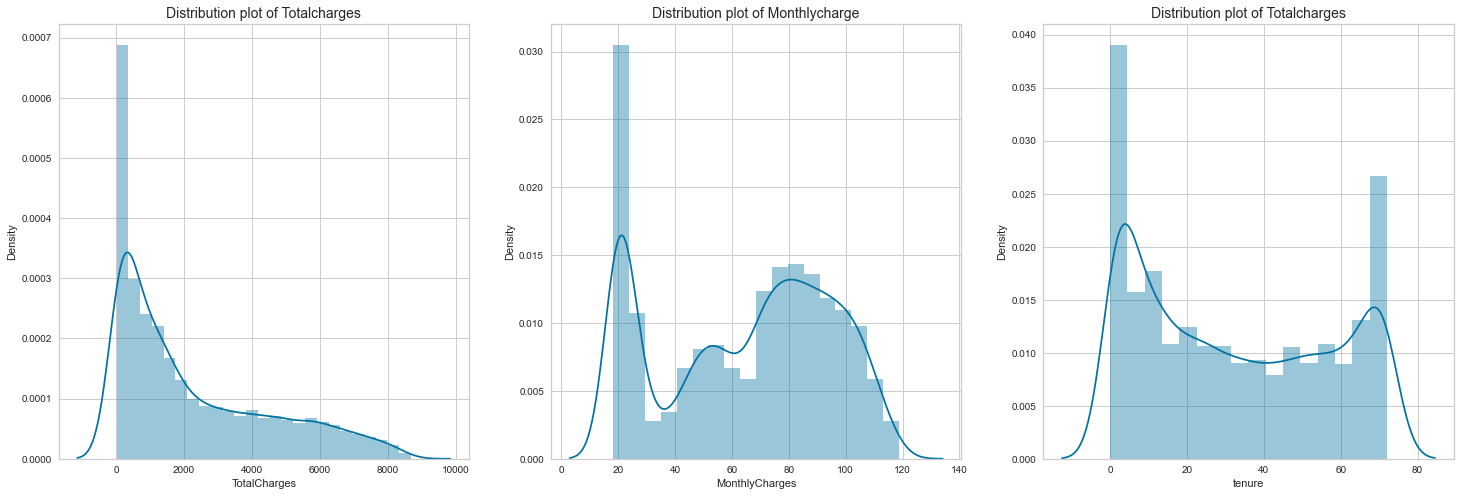

In [15]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
sns.distplot(data['TotalCharges'])
plt.title("Distribution plot of Totalcharges",fontsize=14)
plt.subplot(1,3,2)
sns.distplot(data['MonthlyCharges'])
plt.title("Distribution plot of Monthlycharge",fontsize=14)
plt.subplot(1,3,3)
sns.distplot(data['tenure'])
plt.title("Distribution plot of Totalcharges",fontsize=14)

<b>Total Charges</b>
1-Data is positively skewed

2-Majority of the population spent close to $1,100 dollars

3-Customer have spent upto $8000 dollars

<b>MonthlyCharges</b>
1-It is not normal distributed

2-most of the people spend 18-24 $. must be the service charge for basic service. majority of customer are subscribed to basic package

3-Between 70-100 dollar there are quite no. of customers

<b>Tenure</b>
1-It is Bi-Model distriuted having 2 peak which means data is concentrated across two different group

2-We have a major chunk of customers in 0-1 month period. lot of them might be customers who tried the service and left or liked the service and continue

3-Betwenn 10-65 months we can see flat distribution of data

4-There are lot of customers in 69-72 months range.They are the royal customers

# Bivariate Analysis

In [16]:
col1=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

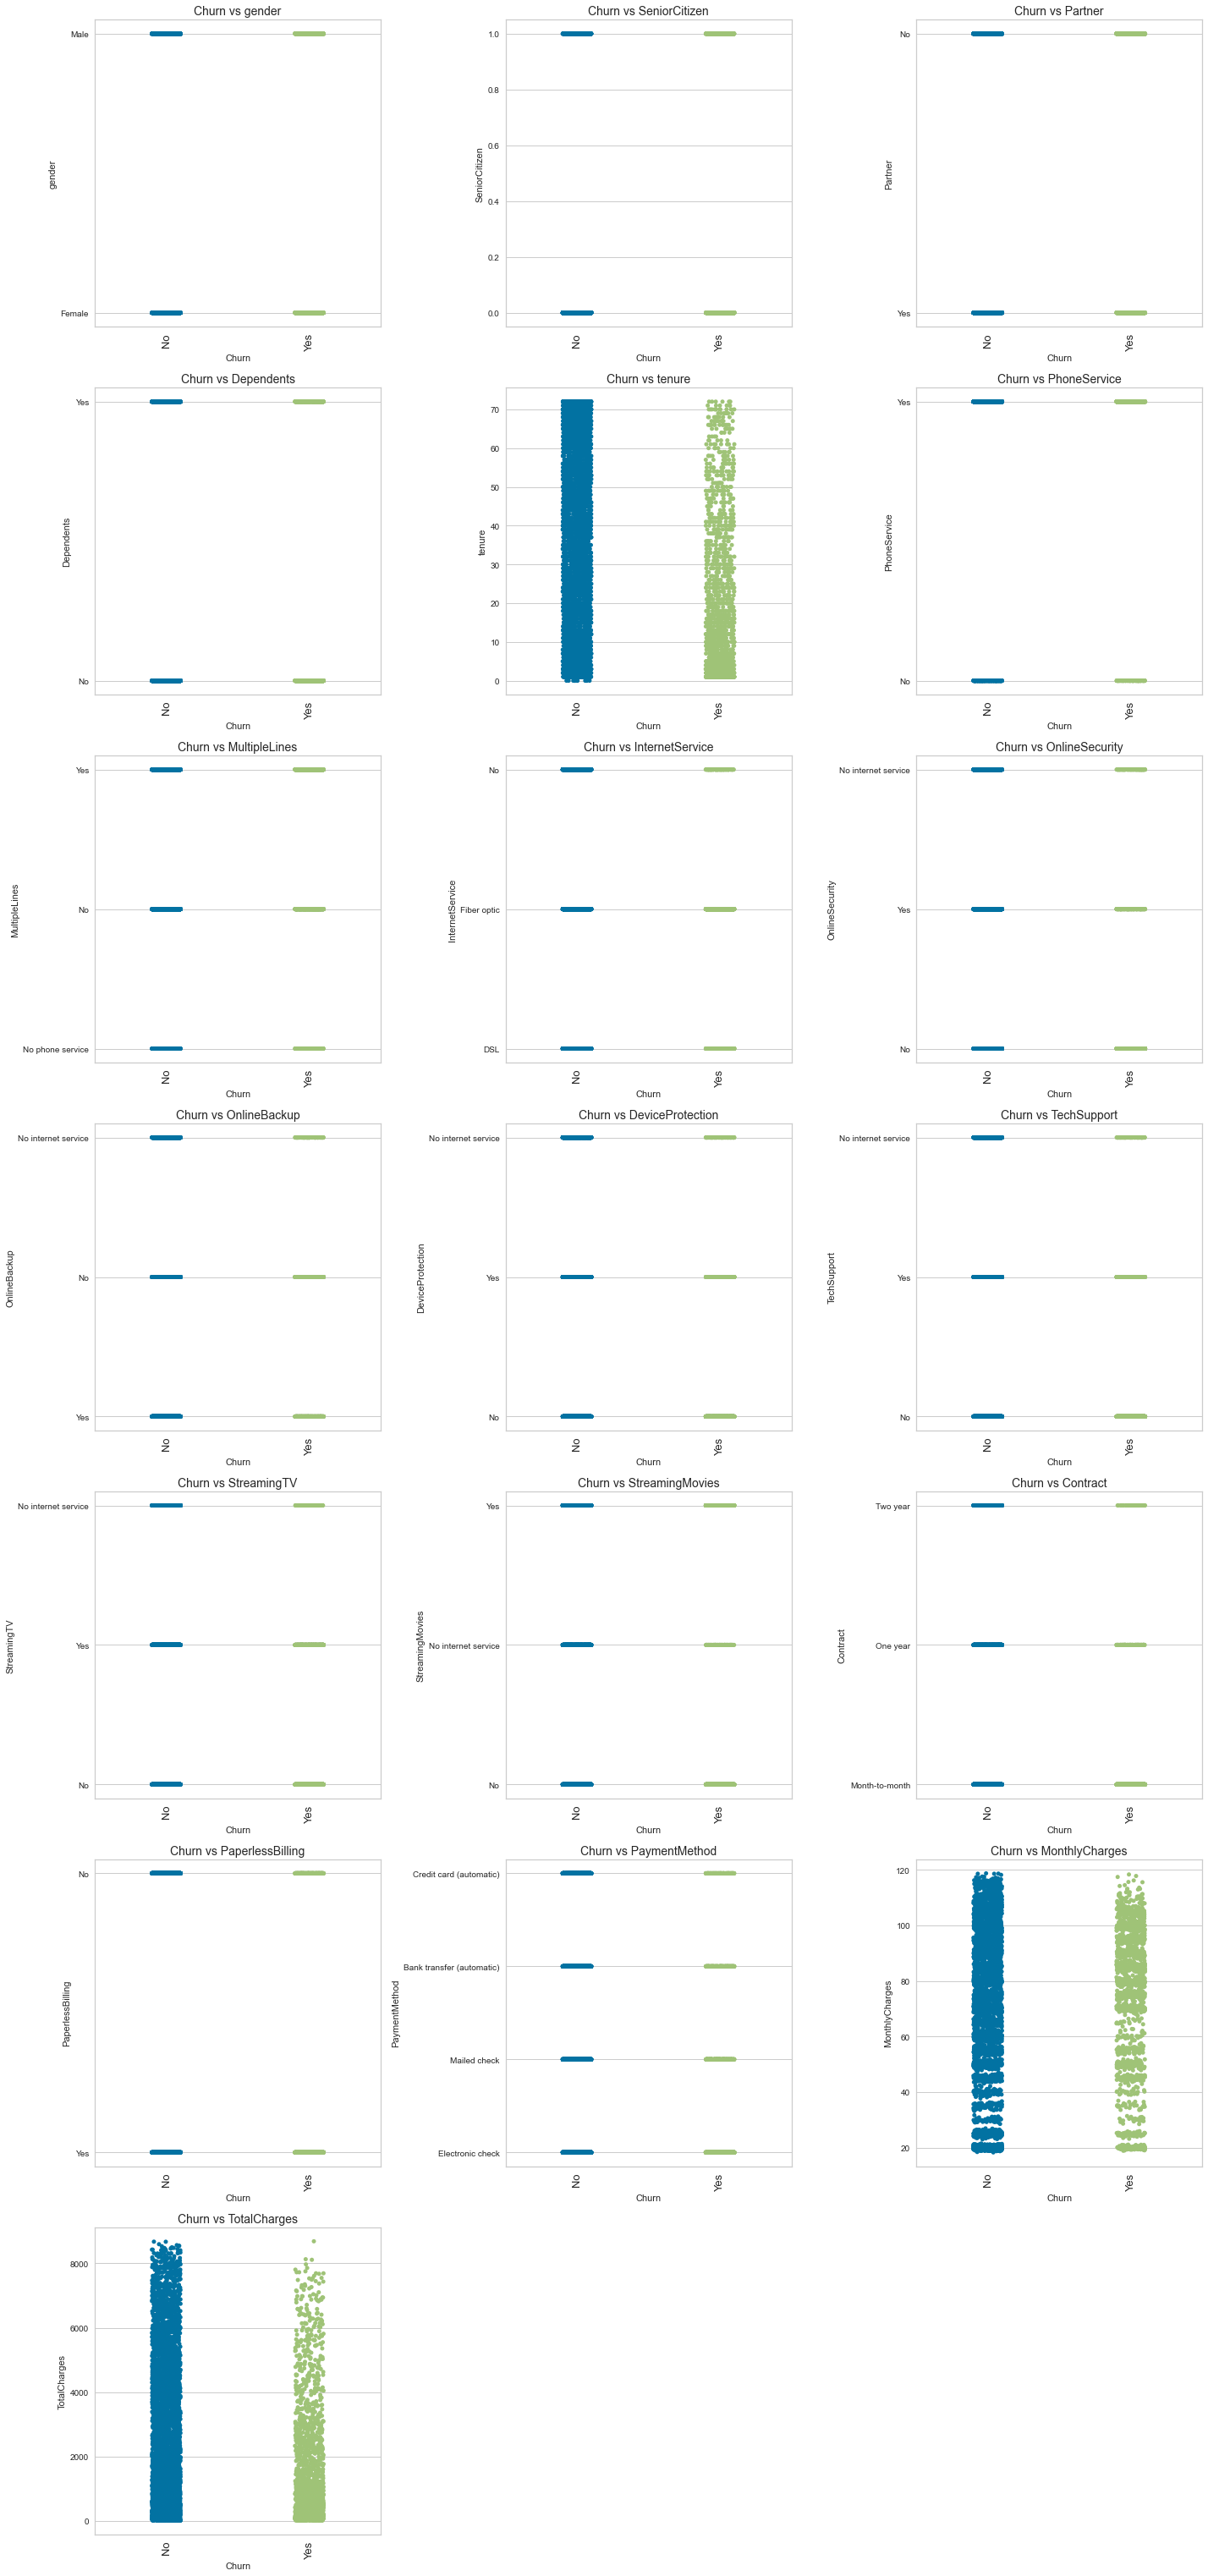

In [17]:
plt.figure(figsize=(20,60))
for i in range(len(col1)):
    plt.subplot(10,3,i+1)
    sns.stripplot(x=data['Churn'],y=data[col1[i]])
    plt.title(f"Churn vs {col1[i]}",fontsize=14)
    plt.xticks(rotation=90,fontsize=13)
    plt.tight_layout()

# Obseravtion

1-From tenure i can say no has high values and yes has less values means tenure is effecting the churn

2-From monthly charge i can say no has more values and high rate where less has less count values

3-From totalcharges i can say no has high value as same like others means it

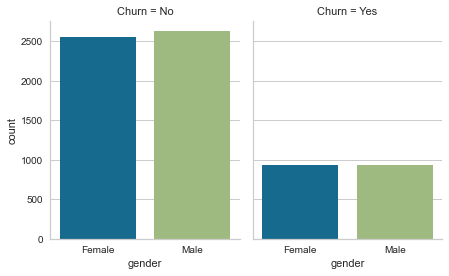

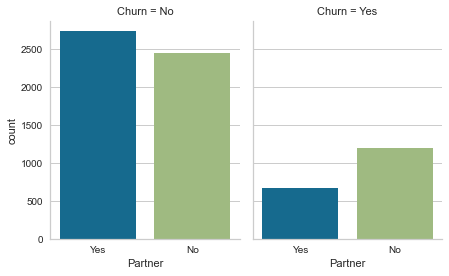

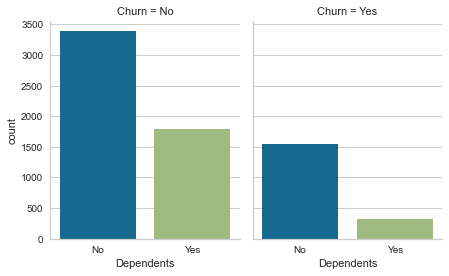

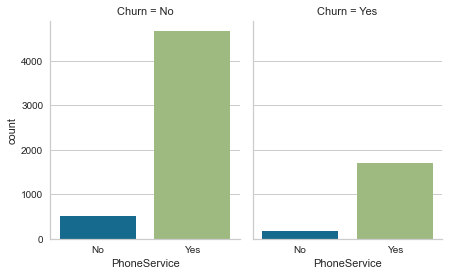

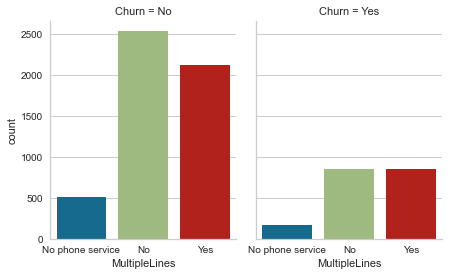

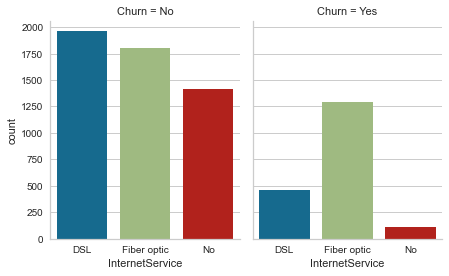

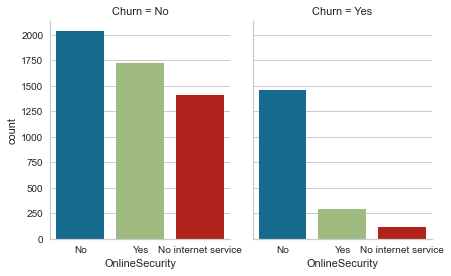

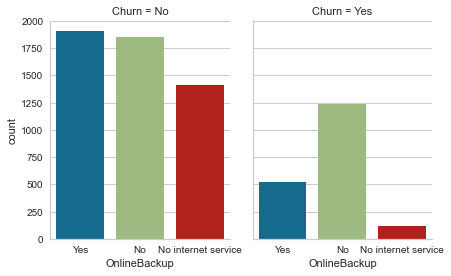

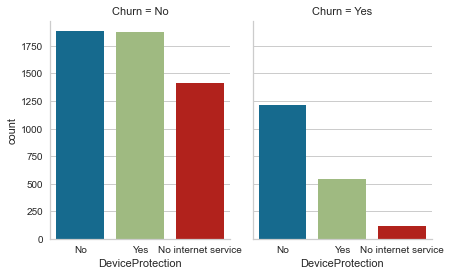

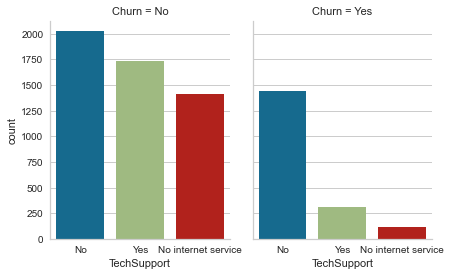

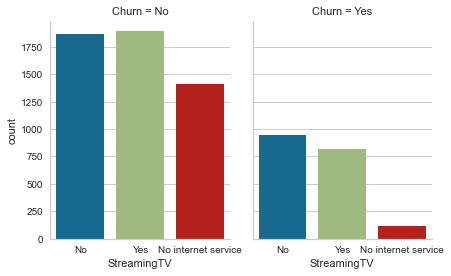

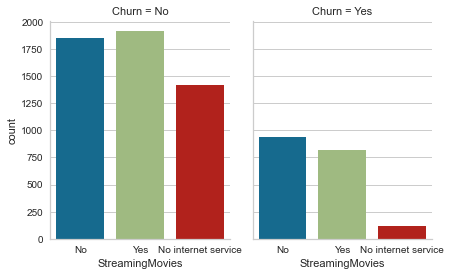

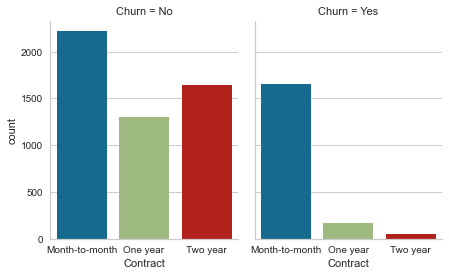

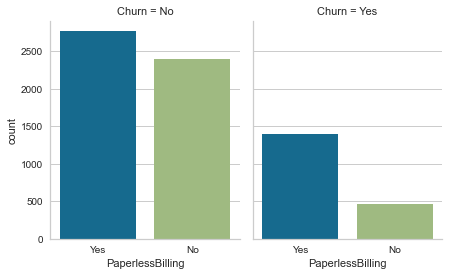

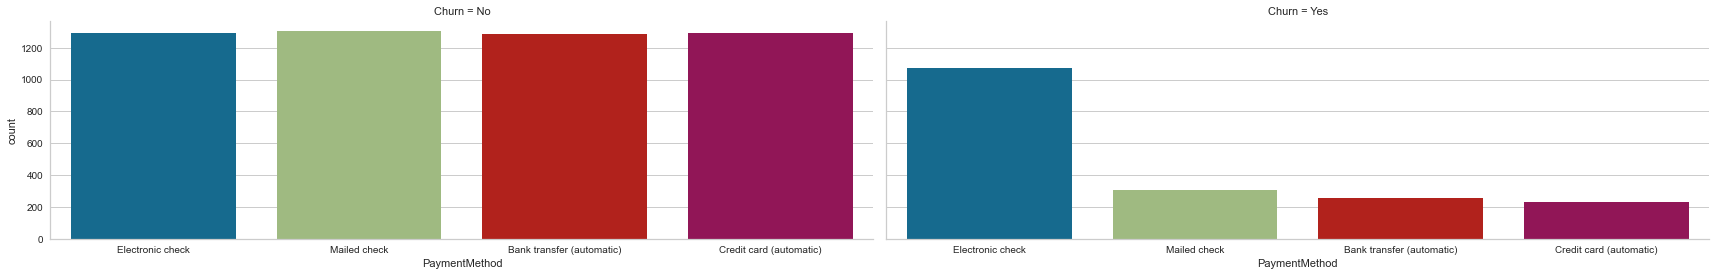

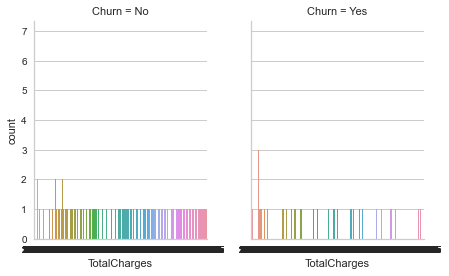

In [18]:
new_data=list(data1.columns)
new_list=new_data
new_data.remove('Churn')
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=3.0
    else:
        aspect_ratio=0.8
    plot=sns.catplot(x=col,col='Churn',data=data,kind='count',height=4,aspect=aspect_ratio)

# Obseravtion

1-Churn has almost equal value for both gender

2-Customer with partner have less chance of leaving

3-Customer with no dependents have high chance of leaving

4-PhoneService with Yes has high chance to churn

5-From multiplelines i can say no phone service has less chance to leave and no and yes has same chance of leave

6-From internet service i can say people with fiber optic has high chance of leaving

7-People with no OnlineSecurity have high chance to leave and people with internet service has less chance to leave

8-People with online backup who dont have backup have high chance to leave and people who dont have internet service have very less chance to leave

9-From device protection i can say Who dont have deviceprotection have high chance to leave and people with no internet service have less chance to leave

10-People who dont have techsupport have high chance and who dont have no internet service have less chance same with streaming tv and streamingMovies

11-People who have contract month-to-month have high chance to leave and people who have two year of contract have less chance to leave

12-People who use PaperlessBilling have high chance to leave and who dont use paperbilling have less chance to leave

13-People who use electroniccheck as a paymentmethod have high chance to leave and rest of all have have less chance to leave

In [19]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.offline import iplot,init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

In [20]:
def pieplot(df_cat,df_val,title,limit=15):
    churn=data[data['Churn']=='Yes'].groupby(df_cat)[df_val].sum().nlargest(limit).to_frame().reset_index()
    no_churn=data[data['Churn']=='No'].groupby(df_cat)[df_val].sum().nlargest(limit).to_frame().reset_index()


  
    trace1=go.Pie(labels=no_churn[df_cat],
                values=no_churn[df_val],name="No Churn",hole=.5,
                hoverinfo="label+percent+name+value",showlegend=True,
                domain={'x':[0,.48]})
  
  

    trace2=go.Pie(labels=churn[df_cat],
                values=churn[df_val],name="Churn",hole=0.5,
                hoverinfo="label+percent+name+value",showlegend=True,
                domain={'x':[0.52,1]})



    layout=dict(title=title,height=450,font=dict(size=15),
              annotations=[
                           dict(
                               x=0.20,y=0.5,
                                text="No churn",
                                showarrow=False,
                                font=dict(size=20)
                           ),
                           dict(
                               x=0.80,y=0.5,
                                text="Churn",
                                showarrow=False,
                                font=dict(size=20)
                           )
              ])
    fig=dict(data=[trace1,trace2],layout=layout)
    iplot(fig)

In [21]:
pieplot("InternetService","MonthlyCharges","Internet Service Total Charge by churn",limit=10)

We can see 82.2% of people churn who use fiber internet

In [22]:
pieplot("Contract","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthly Charges",limit=10)

people who churn 87% of all monthly income lost are cause by customer with month-to-month contracts

In [23]:
pieplot("MultipleLines","MonthlyCharges","Type of Contract by Churn or not with Ratio of monthly charges",limit=10)

People who churn spent there 54.4% of monthly income with multiplelines

In [24]:
pieplot("DeviceProtection","MonthlyCharges","Types of Contract by Churn or not with ratio of Monthly Charges",limit=10)

63.8% of People Who Churn was not using deviceprotection and 34.6% of them was using it

In [25]:
pieplot("TechSupport","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthy Charges",limit=10)

People who churn was not getting techSupport so if people will get Tech support they might not churn

In [26]:
pieplot("OnlineBackup","MonthlyCharges","Type of Contract by Churn or not with Ratio of Monthly Charge",limit=10)

66% People who chured was not having onlinebackup

In [27]:
pieplot("OnlineSecurity","MonthlyCharges","Type of Contract by churn or not with Ratio of monthly charges",limit=10)

81% People who churned was not having online security but there are still 48% people who are not having security but still they dont churn

In [28]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85     29.850000   
1               No               Mailed check           56.95   1889.500000   
2              Yes               Mailed check           53.85    108.150002   
3               No  Bank transfer (automatic)           42.30   1840.750000   
4              Yes           Electronic check           70.70    151.649994   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [29]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='object'}

{'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

Checking all the columns how many unique values they have so it will help me to encode them

# Feature Encoding

In [30]:
oe=OrdinalEncoder()
def ordinal_encode(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

In [31]:
data=ordinal_encode(data,['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'])

# Feature Engineering

In [32]:
data['TenureRange']=pd.cut(data['tenure'],5)
data[['TenureRange','Churn']].groupby(['TenureRange'],as_index=False).mean().sort_values(by='TenureRange',ascending=True)

data.loc[ data['tenure']<=8, 'TenureCat']=0
data.loc[(data['tenure']>8) & (data['tenure']<=15),'TenureCat']=1
data.loc[(data['tenure']>15) & (data['tenure']<=30),'TenureCat']=2
data.loc[(data['tenure']>30) & (data['tenure']<=45),'TenureCat']=3
data.loc[(data['tenure']>45) & (data['tenure']<=60),'TenureCat']=4
data.loc[data['tenure']>60 ,'TenureCat']=5
data[['tenure','TenureRange','TenureCat']].head(10)

tenure     TenureRange  TenureCat
0       1  (-0.072, 14.4]        0.0
1      34    (28.8, 43.2]        3.0
2       2  (-0.072, 14.4]        0.0
3      45    (43.2, 57.6]        3.0
4       2  (-0.072, 14.4]        0.0
5       8  (-0.072, 14.4]        0.0
6      22    (14.4, 28.8]        2.0
7      10  (-0.072, 14.4]        1.0
8      28    (14.4, 28.8]        2.0
9      62    (57.6, 72.0]        5.0

In [33]:
data['MonthlyChargesRange']=pd.cut(data['MonthlyCharges'],5)
data[['MonthlyChargesRange','Churn']].groupby(['MonthlyChargesRange'],as_index=False).mean().sort_values(by='MonthlyChargesRange',ascending=True)

data.loc[data['MonthlyCharges']<=20,'MonthlyChargeCat']=0
data.loc[(data['MonthlyCharges']>20) & (data['MonthlyCharges']<=40),'MonthlyChargeCat']=1
data.loc[(data['MonthlyCharges']>40) & (data['MonthlyCharges']<=60),'MonthlyChargeCat']=2
data.loc[(data['MonthlyCharges']>60) & (data['MonthlyCharges']<=80),'MonthlyChargeCat']=3
data.loc[(data['MonthlyCharges']>80) & (data['MonthlyCharges']<=100),'MonthlyChargeCat']=4
data.loc[data['MonthlyCharges']>100,'MonthlyChargeCat']=5
data[['MonthlyCharges','MonthlyChargesRange','MonthlyChargeCat']].head(10)

MonthlyCharges MonthlyChargesRange  MonthlyChargeCat
0           29.85      (18.15, 38.35]               1.0
1           56.95      (38.35, 58.45]               2.0
2           53.85      (38.35, 58.45]               2.0
3           42.30      (38.35, 58.45]               2.0
4           70.70      (58.45, 78.55]               3.0
5           99.65     (98.65, 118.75]               4.0
6           89.10      (78.55, 98.65]               4.0
7           29.75      (18.15, 38.35]               1.0
8          104.80     (98.65, 118.75]               5.0
9           56.15      (38.35, 58.45]               2.0

In [34]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     0.0              0      1.0         0.0       1           0.0   
1     1.0              0      0.0         0.0      34           1.0   
2     1.0              0      0.0         0.0       2           1.0   
3     1.0              0      0.0         0.0      45           0.0   
4     0.0              0      0.0         0.0       2           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0            1.0              0.0             0.0           2.0  ...   
1            0.0              0.0             2.0           0.0  ...   
2            0.0              0.0             2.0           2.0  ...   
3            1.0              0.0             2.0           0.0  ...   
4            0.0              1.0             0.0           0.0  ...   

   Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
0       0.0               1.0            2.0           29.85     29.850000   
1       1.0               0.0            3.0           56.95   1889.500000   
2       0.0               1.0            3.0           53.85    108.150002   
3       1.0               0.0            0.0           42.30   1840.750000   
4       0.0               1.0            2.0           70.70    151.649994   

   Churn     TenureRange  TenureCat  MonthlyChargesRange  MonthlyChargeCat  
0    0.0  (-0.072, 14.4]        0.0       (18.15, 38.35]               1.0  
1    0.0    (28.8, 43.2]        3.0       (38.35, 58.45]               2.0  
2    1.0  (-0.072, 14.4]        0.0       (38.35, 58.45]               2.0  
3    0.0    (43.2, 57.6]        3.0       (38.35, 58.45]               2.0  
4    1.0  (-0.072, 14.4]        0.0       (58.45, 78.55]               3.0  

[5 rows x 24 columns]

In [35]:
data.drop(['MonthlyChargesRange','TenureRange'],axis=1,inplace=True)

In [36]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
TenureCat            0
MonthlyChargeCat     0
dtype: int64

this missing value came from where i have converted the str value or empty space by nan

In [37]:
def preprocess(df):
    df=df.copy()
    df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
    X=df.drop(['Churn'],axis=1)
    y=df['Churn']
    return X,y

In [38]:
X,y=preprocess(data)

Separating data between dependent variable and independent varaible

# Multivariate Analysis

<AxesSubplot:>

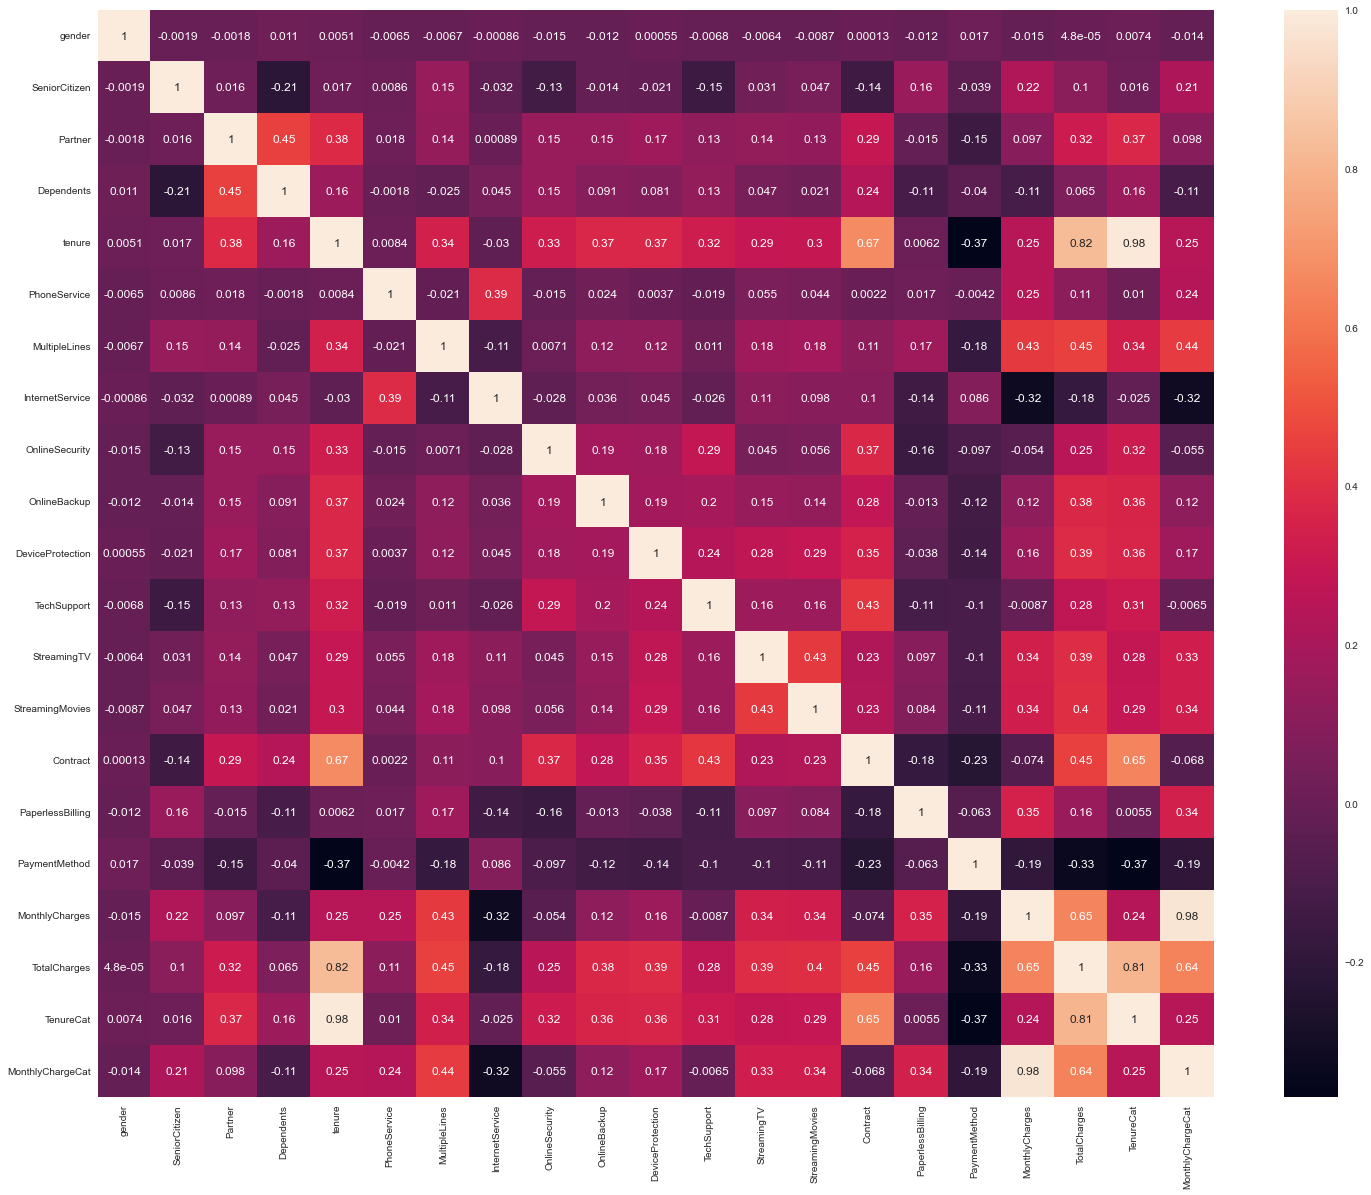

In [39]:
plt.figure(figsize=(25,20))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

From heatmap i can say we have many columns that have good correlation but there is no columns that are having high correlation like 90% so its good that we dont have that

In [40]:
x=X

# Checking Outliers

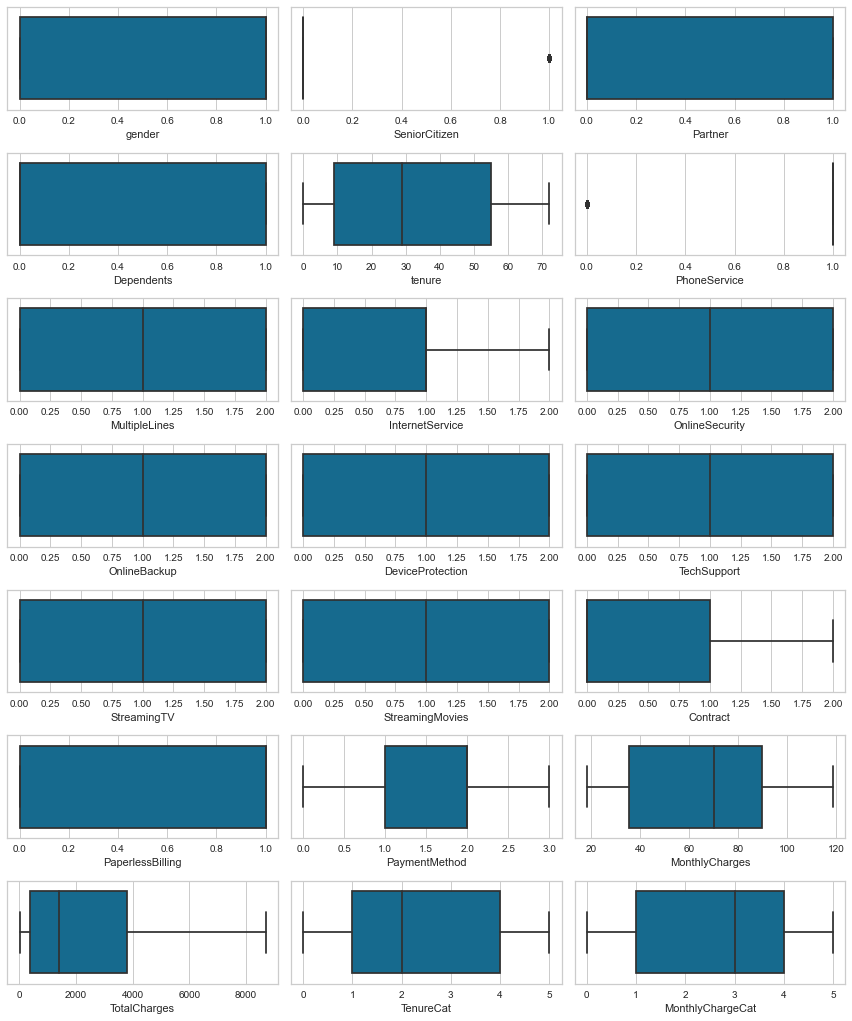

In [41]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(10,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

There is no outliers so no need to remove them

# Balancing data

In [42]:
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0               1.0              0.0             0.0           2.0  ...   
1               0.0              0.0             2.0           0.0  ...   
2               0.0              0.0             2.0           2.0  ...   
3               1.0              0.0             2.0           0.0  ...   
4               0.0              1.0             0.0           0.0  ...   
...             ...              ...             ...           ...  ...   
7038            2.0              0.0             2.0           0.0  ...   
7039            2.0              1.0             0.0           2.0  ...   
7040            1.0              0.0             2.0           0.0  ...   
7041            2.0              1.0             0.0           0.0  ...   
7042            0.0              1.0             2.0           0.0  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0             0.0          0.0              0.0       0.0               1.0   
1             0.0          0.0              0.0       1.0               0.0   
2             0.0          0.0              0.0       0.0               1.0   
3             2.0          0.0              0.0       1.0               0.0   
4             0.0          0.0              0.0       0.0               1.0   
...           ...          ...              ...       ...               ...   
7038          2.0          2.0              2.0       1.0               1.0   
7039          0.0          2.0              2.0       1.0               1.0   
7040          0.0          0.0              0.0       0.0               1.0   
7041          0.0          0.0              0.0       0.0               1.0   
7042          2.0          2.0              2.0       2.0               1.0   

      PaymentMethod  MonthlyCharges  TotalCharges  TenureCat  MonthlyChargeCat  
0               2.0           29.85     29.850000        0.0               1.0  
1               3.0           56.95   1889.500000        3.0               2.0  
2               3.0           53.85    108.150002        0.0               2.0  
3               0.0           42.30   1840.750000        3.0               2.0  
4               2.0           70.70    151.649994        0.0               3.0  
...             ...             ...           ...        ...               ...  
7038            3.0           84.80   1990.500000        2.0               4.0  
7039            1.0          103.20   7362.899902        5.0               5.0  
7040            2.0           29.60    346.450012        1.0               1.0  
7041            3.0           74.40    306.600006        0.0               3.0  
7042            0.0          105.65   6844.500000        5.0               5.0  

[7043 rows x 21 columns]

In [43]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [44]:
from imblearn.over_sampling import KMeansSMOTE
Ksmote=KMeansSMOTE(kmeans_estimator=100, sampling_strategy='auto', k_neighbors=2, random_state=42)
X_res,y_res=Ksmote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Churn'])

# Checking difference between balanced data and imbalanced data

Text(0.5, 1.0, 'Balanced Data')

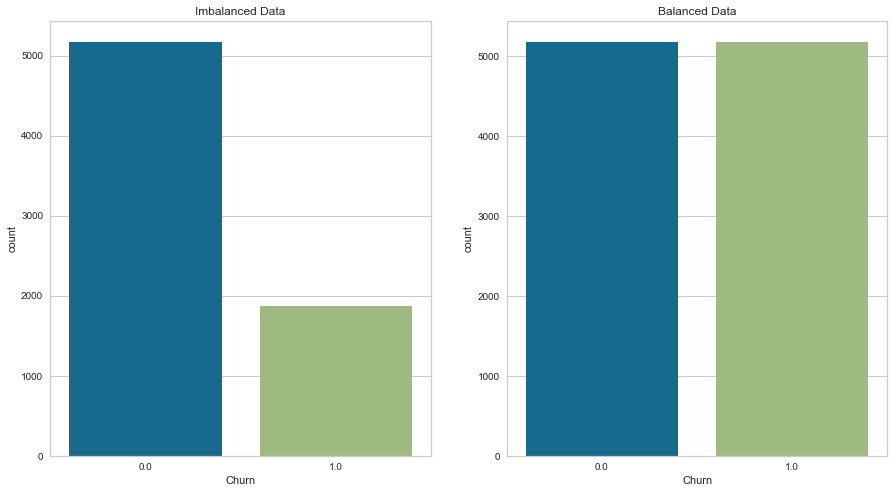

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Churn'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Churn'])
plt.title("Balanced Data")

Now data is balanced properly for machine learning

# Checking skewness

In [46]:
X_new.skew()

gender              0.018110
SeniorCitizen       1.864290
Partner             0.495026
Dependents          1.220581
tenure              0.791916
PhoneService       -3.491203
MultipleLines       0.355062
InternetService     0.061342
OnlineSecurity      0.969252
OnlineBackup        0.697770
DeviceProtection    0.655358
TechSupport         0.979501
StreamingTV         0.296001
StreamingMovies     0.328831
Contract            1.224456
PaperlessBilling   -0.668841
PaymentMethod      -0.531271
MonthlyCharges     -0.609318
TotalCharges        1.459984
TenureCat           0.636229
MonthlyChargeCat   -0.562224
dtype: float64

There is only one column totalcharges that is skewed so i am applying log transform for this so skewness will be removed and there are also columns that are skewed but these columns are categorical so no need to apply log transform on that we have to apply log transform on continuous feature only

In [47]:
X_new['TotalCharges']=np.log1p(X_new['TotalCharges'])

# Feature Scaling

In [48]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

Spliting data into train and test using 30% data for testing

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [50]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Training Multiple Models

In [51]:
models={
    "ExtraTrees  Classifier":ExtraTreesClassifier(),
    "RandomForest  Classifier":RandomForestClassifier(),
    "Logistic  Regression":LogisticRegression(),
    "DecisionTree  Classifier":DecisionTreeClassifier(),
    "XGB  Classifier":XGBClassifier(eval_metric='mlogloss'),
    "LGBM  Classifier":LGBMClassifier()
}

********************************************* ExtraTrees  Classifier *********************************************
ACCURACY SCORE 0.8580167417900837


Cross Val Score 85.8577456805156


Confusion metrics
[[1406  160]
 [ 281 1259]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1566
         1.0       0.89      0.82      0.85      1540

    accuracy                           0.86      3106
   macro avg       0.86      0.86      0.86      3106
weighted avg       0.86      0.86      0.86      3106



Roc Auc Curve


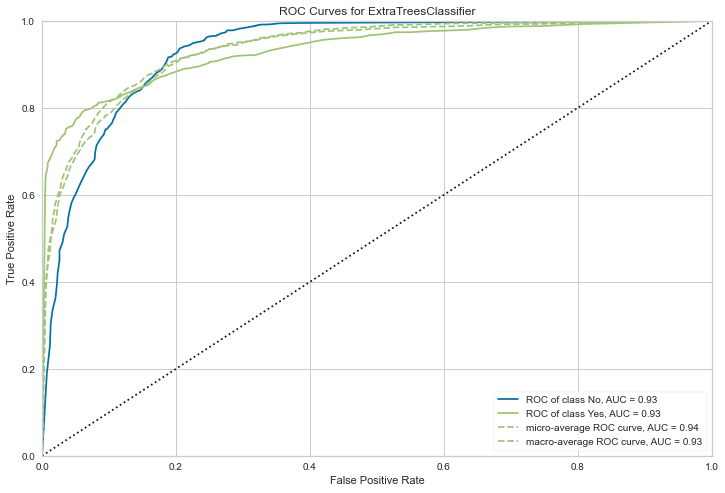

Model Learning Curve


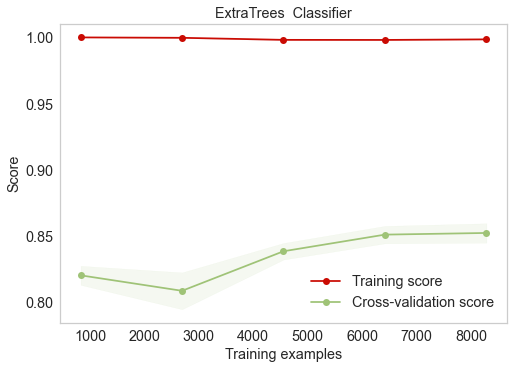

********************************************* RandomForest  Classifier *********************************************
ACCURACY SCORE 0.868319381841597


Cross Val Score 85.96409585324831


Confusion metrics
[[1423  143]
 [ 266 1274]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1566
         1.0       0.90      0.83      0.86      1540

    accuracy                           0.87      3106
   macro avg       0.87      0.87      0.87      3106
weighted avg       0.87      0.87      0.87      3106



Roc Auc Curve


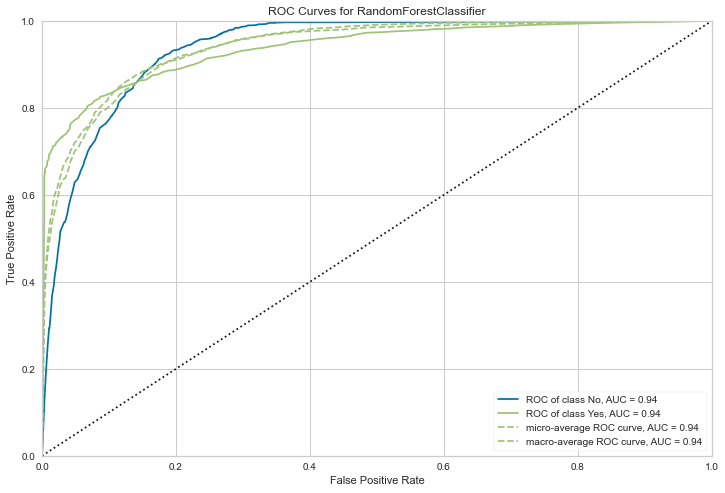

Model Learning Curve


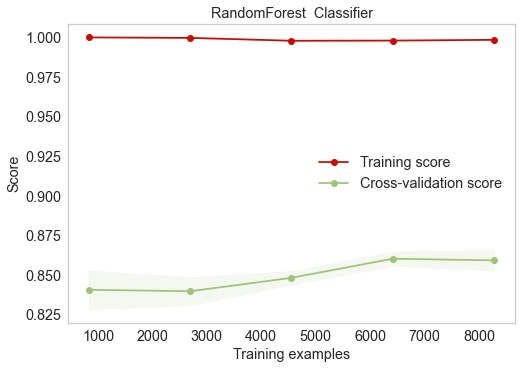

********************************************* Logistic  Regression *********************************************
ACCURACY SCORE 0.8692852543464262


Cross Val Score 86.36973899980639


Confusion metrics
[[1377  189]
 [ 217 1323]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1566
         1.0       0.88      0.86      0.87      1540

    accuracy                           0.87      3106
   macro avg       0.87      0.87      0.87      3106
weighted avg       0.87      0.87      0.87      3106



Roc Auc Curve


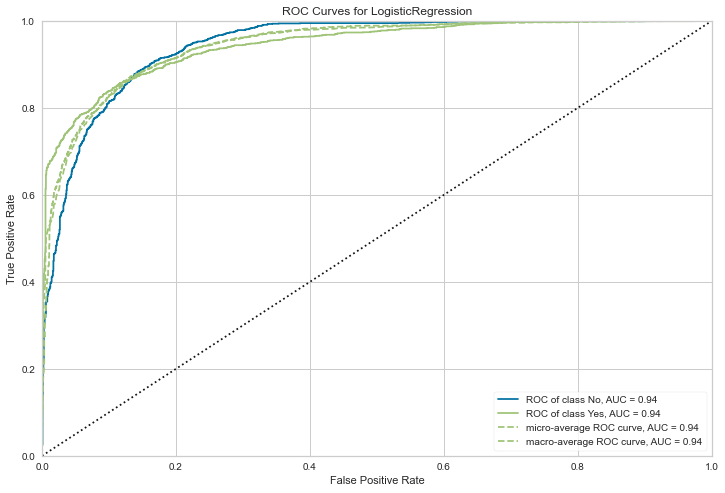

Model Learning Curve


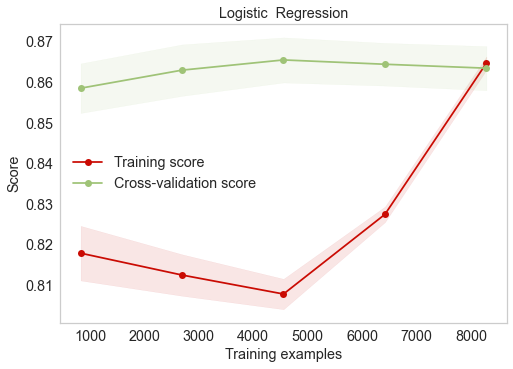

********************************************* DecisionTree  Classifier *********************************************
ACCURACY SCORE 0.813586606567933


Cross Val Score 81.42396144596302


Confusion metrics
[[1266  300]
 [ 279 1261]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1566
         1.0       0.81      0.82      0.81      1540

    accuracy                           0.81      3106
   macro avg       0.81      0.81      0.81      3106
weighted avg       0.81      0.81      0.81      3106



Roc Auc Curve


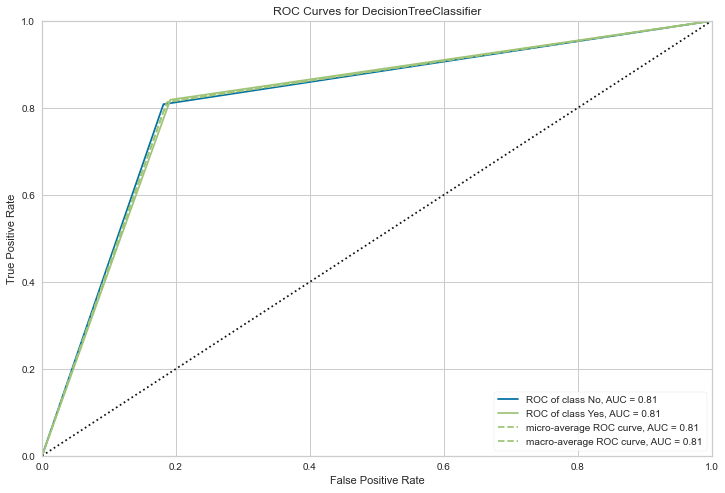

Model Learning Curve


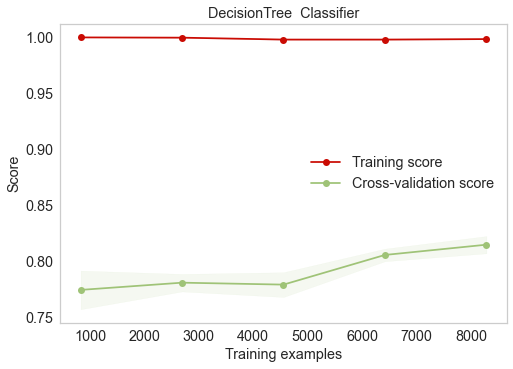

********************************************* XGB  Classifier *********************************************
ACCURACY SCORE 0.8602704443013522


Cross Val Score 85.62575898595045


Confusion metrics
[[1381  185]
 [ 249 1291]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1566
         1.0       0.87      0.84      0.86      1540

    accuracy                           0.86      3106
   macro avg       0.86      0.86      0.86      3106
weighted avg       0.86      0.86      0.86      3106



Roc Auc Curve


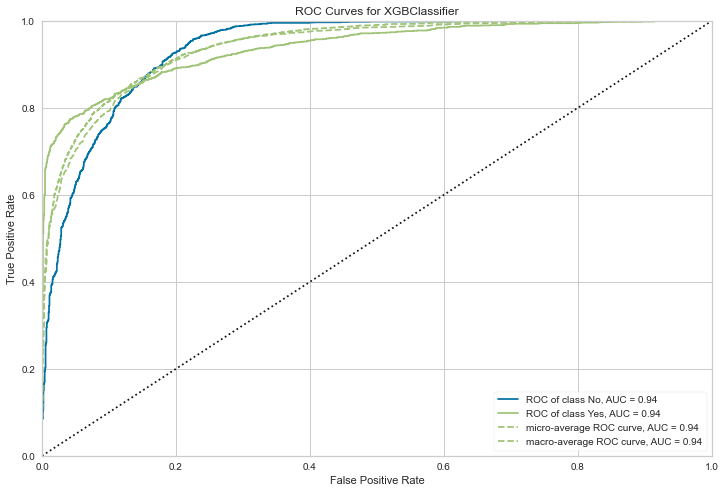

Model Learning Curve


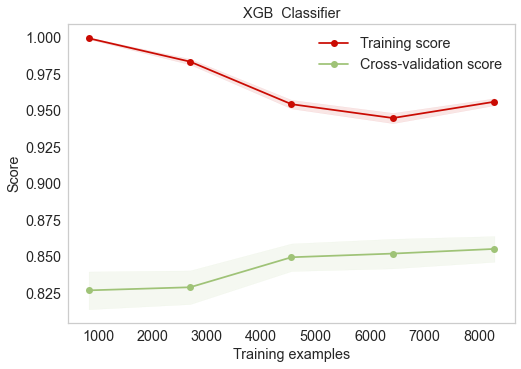

********************************************* LGBM  Classifier *********************************************
ACCURACY SCORE 0.8609143593045718


Cross Val Score 86.05108036678587


Confusion metrics
[[1390  176]
 [ 256 1284]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1566
         1.0       0.88      0.83      0.86      1540

    accuracy                           0.86      3106
   macro avg       0.86      0.86      0.86      3106
weighted avg       0.86      0.86      0.86      3106



Roc Auc Curve


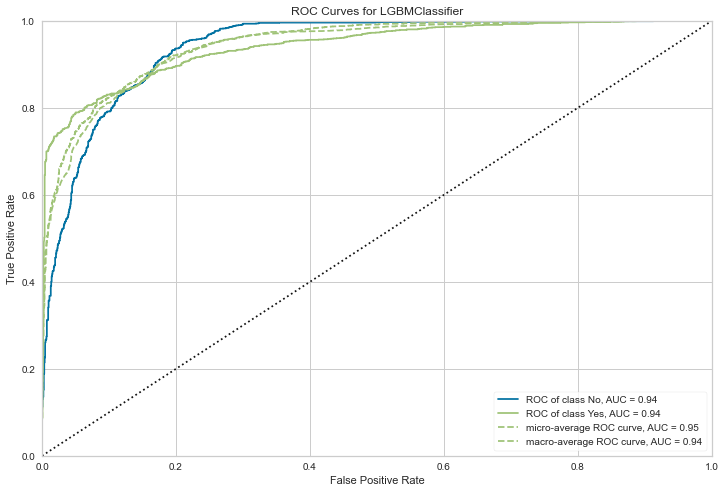

Model Learning Curve


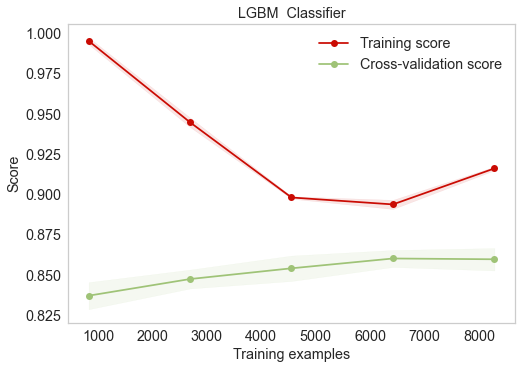

In [52]:
NAME=[]
CVS=[]
ACCURACY_SCORE=[]
skf=StratifiedKFold(n_splits=5,shuffle=True)
for name,model in models.items():
    print("*********************************************",name,"*********************************************")
    NAME.append(name)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    ACCURACY_SCORE.append(accuracy)
    print("ACCURACY SCORE",accuracy)
    cvs=cross_val_score(model,X_new,y_new,scoring='accuracy',cv=skf).mean()
    CVS.append(cvs)
    print("\n")
    print("Cross Val Score",cvs*100)
    cm=confusion_matrix(y_test,y_pred)
    print("\n")
    print("Confusion metrics")
    print(cm)
    report=classification_report(y_test,y_pred)
    print("\n")
    print("Classification Report")
    print(report)
    print("\n")
    print("Roc Auc Curve")
    plt.figure(figsize=(12,8))
    roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
    print("Model Learning Curve")
    skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

I will select LightGBM because it is giving me good metrics results

In [53]:
lgb=LGBMClassifier()

# Hyperparameter tuning

In [54]:
params={'boosting_type': ['gbdt','dart','goss'],
 'importance_type': ['split','gain'],
 'max_depth': [-1,None,1,2,3],
 'n_estimators': [100,200,500]
}

In [55]:
Grid=GridSearchCV(estimator=lgb,param_grid=params,scoring='accuracy',n_jobs=-1,cv=skf)

In [56]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'importance_type': ['split', 'gain'],
                         'max_depth': [-1, None, 1, 2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [57]:
Grid.best_params_

{'boosting_type': 'dart',
 'importance_type': 'split',
 'max_depth': 2,
 'n_estimators': 500}

In [58]:
Grid.best_score_

0.8682373331280602

Accuracy increased from 86.01 to 86.20

In [59]:
light=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 max_depth= 3,
 n_estimators= 500)

# Final Model learning Curve

Roc Auc Curve


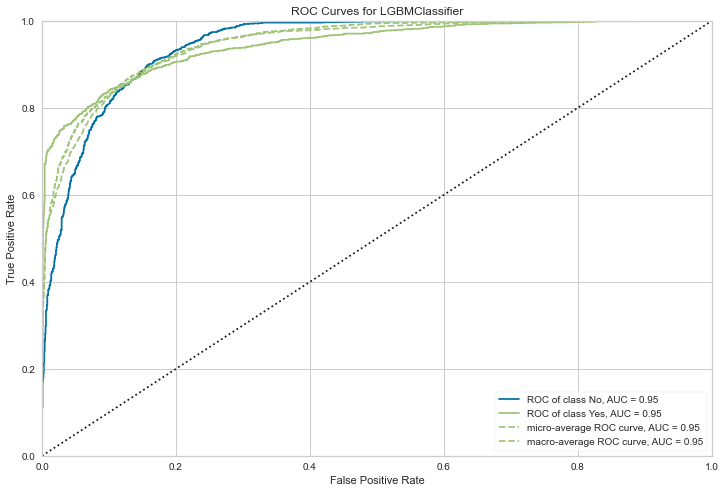

Model Learning Curve


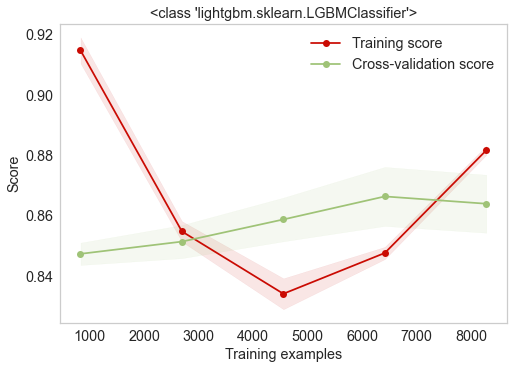

In [60]:
print("Roc Auc Curve")
plt.figure(figsize=(12,8))
roc_auc(light,X_train,y_train,X_test=X_test,y_test=y_test,classes=["No","Yes"],micro=True,macro=True)
print("Model Learning Curve")
skplt.estimators.plot_learning_curve(light,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=LGBMClassifier)
plt.show()

# Final Model metrics

In [61]:
light.fit(X_train,y_train)
y_prediction=light.predict(X_test)

In [62]:
print("Accurcay Score",accuracy_score(y_test,y_prediction))
print("Confusion Metrics")
print(confusion_matrix(y_test,y_prediction))
print("Classification Report")
print(classification_report(y_test,y_prediction))

Accurcay Score 0.8692852543464262
Confusion Metrics
[[1429  137]
 [ 269 1271]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1566
         1.0       0.90      0.83      0.86      1540

    accuracy                           0.87      3106
   macro avg       0.87      0.87      0.87      3106
weighted avg       0.87      0.87      0.87      3106



In [63]:
import joblib
joblib.dump(Grid,"Churn_Prediction.obj")

['Churn_Prediction.obj']

In [64]:
model=joblib.load('Churn_Prediction.obj')

In [65]:
model.predict(X_test)

array([1., 1., 1., ..., 0., 0., 0.])

# Conclusion

1-After doing eda i can say for gender churn is equal we cant say female is leaving more or male both are same for churn

2-we can only select those who have partner because they have less chance to leave

3-and we can select only people who have dependents so they will have less chance of leaving

4-if people will have online security and backup they will not leave

5-if people will have techsupport they will not leave

6-same with if people use paperlessbilling and electroniccheck they have high chance to leave and people who have contract month-to-month they have a very high chance to leave

7-so if we have a data of customers so we can already know who will stay and who will leave if someone will leave we can provide them these services so there chance of leaving will get reduced